# Evaluation of the Anomalies class

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.datasets import fetch_california_housing

from nescience.anomalies import Anomalies

## Abnormal Hand Written Digits

Load the digits dataset

In [17]:
X, y = load_digits(return_X_y=True)

Find the anomalies

In [18]:
model = Anomalies(y_type="categorical")
model.fit(X, y)
anomalies = model.get_anomalies()

In [19]:
X.shape, anomalies.shape

((1797, 64), (173,))

Let's visualize a particular anomaly

<Figure size 432x288 with 0 Axes>

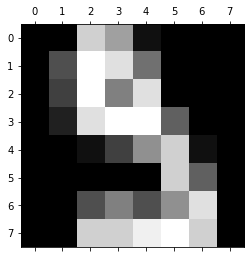

In [20]:
plt.gray() 
plt.matshow(X[anomalies[1]].reshape([8,8])) 
plt.show() 

It is supposed that it is a number 9. Compare with a number 9 classified as normal.

<Figure size 432x288 with 0 Axes>

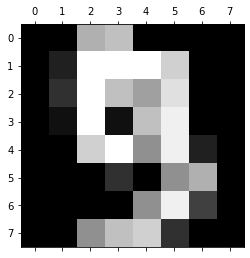

In [6]:
plt.gray() 
plt.matshow(X[9].reshape([8,8]))
plt.show()

## Abnormally Low House Prices

In [7]:
X, y = fetch_california_housing(return_X_y=True)

In [8]:
model = Anomalies(y_type="numeric")
model.fit(X, y)

In [9]:
anomalies = model.get_anomalies("all")
X.shape, anomalies.shape

((20640, 8), (11744,))

In [10]:
anomalies = model.get_anomalies("smaller")
X.shape, anomalies.shape

((20640, 8), (4226,))

In [11]:
anomalies = model.get_anomalies("greater")
X.shape, anomalies.shape

((20640, 8), (7518,))

Analyze the results

In [12]:
model.get_classes(n_dims=1, an_type="smaller", filter_balancedness=False, filter_redundancy=False, filter_repeated_attrs=False)


,Attribute1,Attribute2,Inertia,N Class 0,N Class 1,Ratio
0,0,None,4.691871e+03,3398,828,0.804070
1,1,None,1.859671e+05,2458,1768,0.581637
2,2,None,3.073727e+04,4157,69,0.983673
3,3,None,1.587741e+03,4170,56,0.986749
4,4,None,3.209664e+09,3829,397,0.906058
5,5,None,7.369873e+03,4225,1,0.999763
6,6,None,4.218098e+03,2011,2215,0.475864
7,7,None,3.917336e+03,2279,1947,0.539281


In [13]:
model.get_classes(n_dims=1, an_type="smaller", filter_balancedness=True, filter_redundancy=False, filter_repeated_attrs=False)

,Attribute1,Attribute2,Inertia,N Class 0,N Class 1,Ratio
1,1,None,185967.076518,1768,2458,0.418363
6,6,None,4218.098294,2215,2011,0.524136
7,7,None,3917.330949,2281,1945,0.539754


In [14]:
model.get_classes(n_dims=1, an_type="smaller", filter_balancedness=True, filter_redundancy=True, filter_repeated_attrs=False)

,Attribute1,Attribute2,Inertia,N Class 0,N Class 1,Ratio
7,7,None,3917.330949,1945,2281,0.460246


Visualize the result

In [15]:
class0, class1 = model.get_class_points(attribute1=7, attribute2=None, an_type="smaller")

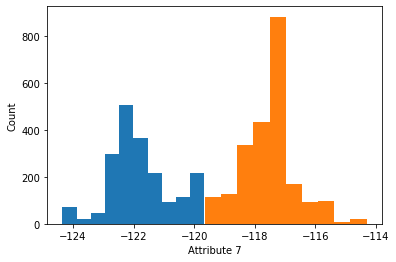

In [16]:
plt.hist(class0)
plt.hist(class1)
plt.ylabel("Count")
plt.xlabel("Attribute 7")
plt.show()

The attribute has a clear bi-modal distribution